/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Initial State: 0
Action Space: Discrete(4)
Observation Space: Discrete(16)
Actions: 0=Left, 1=Down, 2=Right, 3=Up
Step 0: State=0, Action=0, Reward=0.0, Next State=0, Terminated=False
Step 1: State=0, Action=2, Reward=0.0, Next State=1, Terminated=False
Step 2: State=1, Action=3, Reward=0.0, Next State=1, Terminated=False
Step 3: State=1, Action=3, Reward=0.0, Next State=1, Terminated=False
Step 4: State=1, Action=3, Reward=0.0, Next State=1, Terminated=False
Step 5: State=1, Action=3, Reward=0.0, Next State=1, Terminated=False
Step 6: State=1, Action=3, Reward=0.0, Next State=1, Terminated=False
Step 7: State=1, Action=2, Reward=0.0, Next State=2, Terminated=False
Step 8: State=2, Action=1, Reward=0.0, Next State=6, Terminated=False
Step 9: State=6, Action=0, Reward=0.0, Next State=5, Terminated=True
Episode 1 ended with total reward: 0.0

Step 0: State=0, Action=3, Reward=0.0, Next State=0, Terminated=False
Step 1: State=0, Action=2, Reward=0.0, Next State=1, Terminated=False
Step 2:

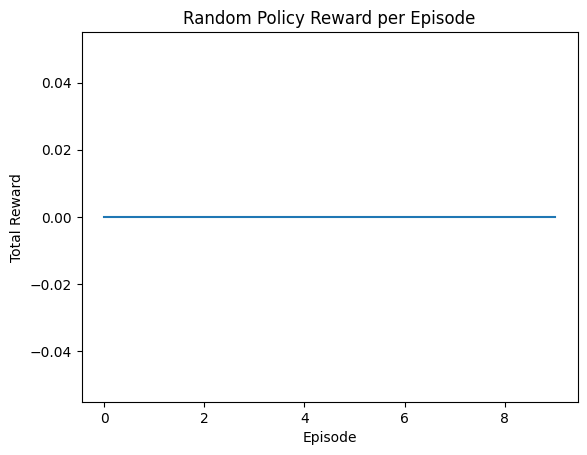

Step 0: State=1, Action=2, Reward=0.0, Terminated=False
Step 1: State=2, Action=2, Reward=0.0, Terminated=False
Step 2: State=6, Action=1, Reward=0.0, Terminated=False
Step 3: State=2, Action=3, Reward=0.0, Terminated=False
Episode 1 ended with total reward: 0.0, done=False

Step 0: State=1, Action=2, Reward=0.0, Terminated=False
Step 1: State=2, Action=2, Reward=0.0, Terminated=False
Step 2: State=6, Action=1, Reward=0.0, Terminated=False
Step 3: State=2, Action=3, Reward=0.0, Terminated=False
Episode 2 ended with total reward: 0.0, done=False

Step 0: State=1, Action=2, Reward=0.0, Terminated=False
Step 1: State=2, Action=2, Reward=0.0, Terminated=False
Step 2: State=6, Action=1, Reward=0.0, Terminated=False
Step 3: State=2, Action=3, Reward=0.0, Terminated=False
Episode 3 ended with total reward: 0.0, done=False

Step 0: State=1, Action=2, Reward=0.0, Terminated=False
Step 1: State=2, Action=2, Reward=0.0, Terminated=False
Step 2: State=6, Action=1, Reward=0.0, Terminated=False
Step

In [13]:
def EnvironmentSetup():
    import gym
    import numpy as np
    if not hasattr(np,"bool8"):np.bool8=np.bool_
    import matplotlib.pyplot as plt

    env=gym.make('FrozenLake-v1',is_slippery=False)  # deterministic environment
    state=env.reset()
    if isinstance(state,tuple):state=state[0]

    print("Initial State:",state)
    print("Action Space:",env.action_space)
    print("Observation Space:",env.observation_space)
    print("Actions: 0=Left, 1=Down, 2=Right, 3=Up")

    return env,state
env,state=EnvironmentSetup()

def InteractionLoop(env,num_episodes=5):
    for episode in range(num_episodes):
        state=env.reset()
        if isinstance(state,tuple):state=state[0]
        terminated=False
        total_reward=0
        step_count=0
        while not terminated:
            action=env.action_space.sample()
            next_state,reward,terminated,_,=env.step(action)
            total_reward+=reward
            print(f"Step {step_count}: State={state}, Action={action}, Reward={reward}, Next State={next_state}, Terminated={terminated}")
            state=next_state
            step_count+=1
        print(f"Episode {episode+1} ended with total reward: {total_reward}\n")
InteractionLoop(env,5)


def VisualizePathRun(env,size=4):
    import numpy as np
    def visualize_path(path,size=4):
        grid=np.full((size,size),'-')
        for step,state in enumerate(path):
            row,col=divmod(state,size)
            grid[row,col]=str(step)
        print(grid)

    state=env.reset()
    if isinstance(state,tuple):state=state[0]
    terminated=False
    path=[state]
    while not terminated:
        action=env.action_space.sample()
        state,reward,terminated,_,=env.step(action)
        path.append(state)
    visualize_path(path)
VisualizePathRun(env)


def VisualizePathComparison(env,size=4,num_episodes=3):
    import numpy as np

    def visualize_path(path,size=4):
        grid=np.full((size,size),'-')
        visit_count=np.zeros((size,size),dtype=int)
        for step,state in enumerate(path):
            row,col=divmod(state,size)
            grid[row,col]=str(step)
            visit_count[row,col]+=1
        print("Path Grid (Step Order):")
        print(grid)
        print("\nVisit Count Grid:")
        print(visit_count)
        most_visited=np.unravel_index(np.argmax(visit_count),(size,size))
        print(f"\nMost visited cell: {most_visited} visited {visit_count[most_visited]} times")

    paths=[]
    steps_list=[]

    for ep in range(num_episodes):
        state=env.reset()
        if isinstance(state,tuple):state=state[0]
        terminated=False
        path=[state]
        step_count=0
        while not terminated:
            action=env.action_space.sample()
            state,reward,terminated,_,=env.step(action)
            path.append(state)
            step_count+=1
        print(f"\nEpisode {ep+1} finished in {step_count} steps")
        visualize_path(path)
        paths.append(path)
        steps_list.append(step_count)

    print("\n--- Path Efficiency Comparison ---")
    for i,steps in enumerate(steps_list):
        print(f"Episode {i+1}: {steps} steps")
    best_ep=np.argmin(steps_list)
    print(f"\nMost efficient path: Episode {best_ep+1} with {steps_list[best_ep]} steps")

VisualizePathComparison(env,size=4,num_episodes=3)


def TrackCumulativeRewards(env,n_episodes=10,plot=True):
    import matplotlib.pyplot as plt
    rewards=[]
    for episode in range(n_episodes):
        state=env.reset()
        if isinstance(state,tuple):state=state[0]
        terminated=False
        total_reward=0
        while not terminated:
            action=env.action_space.sample()
            out=env.step(action)
            if len(out)==5:
                state,reward,terminated,truncated,info=out
                terminated=terminated or truncated
            else:
                state,reward,terminated,info=out
            total_reward+=reward
        rewards.append(total_reward)
    if plot:
        plt.figure()
        plt.plot(rewards)
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.title("Random Policy Reward per Episode")
        plt.show()
    return rewards
rewards=TrackCumulativeRewards(env,n_episodes=10,plot=True)

def RunManualPolicy(env,actions,n_episodes=5,print_steps=True):
    rewards=[]
    for episode in range(n_episodes):
        state=env.reset()
        if isinstance(state,tuple):state=state[0]
        terminated=False
        total_reward=0
        step_count=0
        for a in actions:
            if terminated:break
            out=env.step(int(a))
            if len(out)==5:
                state,reward,terminated,truncated,info=out
                terminated=terminated or truncated
            else:
                state,reward,terminated,info=out
            total_reward+=reward
            if print_steps:
                print(f"Step {step_count}: State={state}, Action={a}, Reward={reward}, Terminated={terminated}")
            step_count+=1
        print(f"Episode {episode+1} ended with total reward: {total_reward}, done={terminated}\n")
        rewards.append(total_reward)
    return rewards


actions=[2,2,1,3]                     # Right, Right, Down, Up (example)
rewards=RunManualPolicy(env,actions,n_episodes=5,print_steps=True)